# NST Experminets Notebook!

This notebook has been tested on google colab.

### Sections:
1. Test Gatys NST implementation with a single pair of content and style images.
2. Test the EvaluationMetrics classs with the generted image.
3. Test the implementation of Gatys NST to perform a collection style trasnger. (NOT WORKING!)

In [1]:
# Run this cell for google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
# Make sure the directory below matches with yours.
%cd /content/drive/MyDrive/cs7643/project/cs7643-project
%ls

/content/drive/MyDrive/cs7643/project/cs7643-project
 collection_style_transfer.py   LICENSE                       picasso_experiments.xlsx
 CycleGAN.ipynb                 module.py                     picasso_nst_experiments.ipynb
 download_cyclegan_dataset.sh   monet_experiments.xlsx        __pycache__/
 Eval/                          monet_nst_experiments.ipynb   README.md
 Eval_data.zip                  multi_style_transfer.py       resnet_style_transfer.py
 eval_metrics.py               'old_style_transfer copy.py'   style_transfer.py
 fcn.py                         PerceptualSimilarity/         testing_data/


In [4]:
# Uncomment this line if you need to unzip the eval_data.
#!unzip Eval_data.zip

## Making Sure the Scripts Work Correcly

We are going to test NST implementation for normal style transfer.

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from style_transfer import StyleTransfer
from resnet_style_transfer import ResNetStyleTransfer

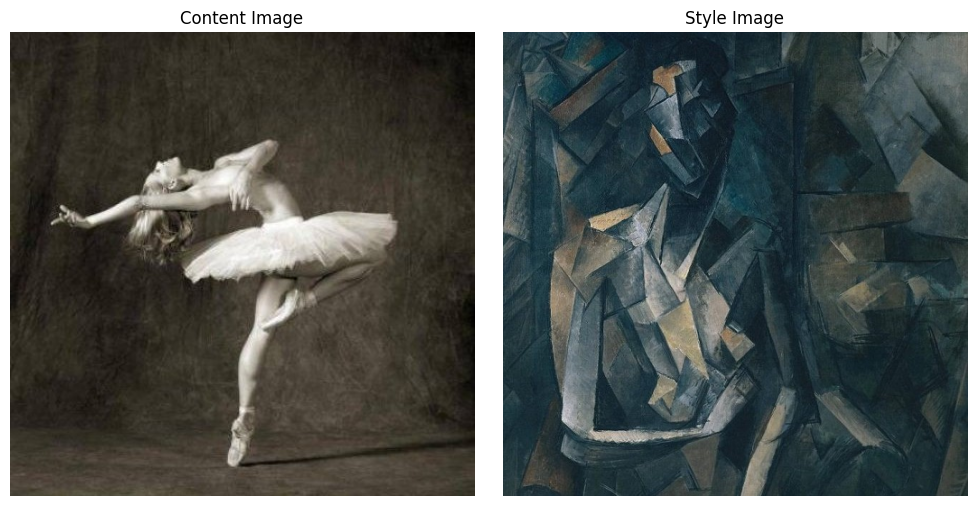

In [7]:
# File paths for the content and style images
content_img_path = "./testing_data/images/dancing.jpg"
#content_img_path = "./testing_data/images/tree.png"
style_img_path = "./testing_data/images/picasso.jpg"

# Load the content and style images using matplotlib.image
content_img = mpimg.imread(content_img_path)
style_img = mpimg.imread(style_img_path)

# Create subplots for displaying the images side by side
plt.figure(figsize=(10, 5))

# Plot the content image on the left subplot
plt.subplot(1, 2, 1)
plt.imshow(content_img)
plt.title('Content Image')
plt.axis('off')  # Turn off axis labels

# Plot the style image on the right subplot
plt.subplot(1, 2, 2)
plt.imshow(style_img)
plt.title('Style Image')
plt.axis('off')  # Turn off axis labels

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Create an instance of the style transfer class with the paths to your images
style_transfer = StyleTransfer(content_img_path, style_img_path)

# Hyper parameters:  num_steps=300, style_weight=1000000, content_weight=1
# Run the style transfer
output = style_transfer.run_style_transfer(style_transfer.content_img, style_transfer.style_img, style_transfer.content_img.clone())

# Display the output
StyleTransfer.imshow(output, title='Output Image')

# Show the plot in the notebook
plt.show()

# Save the resulting image to a file
#style_transfer.save_output_image(output, "./testing_data/images/output_monet.jpg")


# Test Hyperparameter Tunning!

In [16]:
from PIL import Image
from torchvision.utils import save_image
# Function to run style transfer and save the output
def run_style_transfer_and_save(style_weight, content_weight, num_steps, content_layers, style_layers, tv_weight, model_choice, optimizer_choice, loss_choice, output_filename):
    print('model: ', model_choice)
    if model_choice == 'vgg':
      style_transfer = StyleTransfer("./testing_data/images/dancing.jpg", "./testing_data/images/picasso.jpg")
    elif model_choice == 'resnet':
      style_transfer = StyleTransferResNet(("./testing_data/images/dancing.jpg", "./testing_data/images/picasso.jpg"))

    output = style_transfer.run_style_transfer(
        style_transfer.content_img,
        style_transfer.style_img,
        style_transfer.content_img.clone(),
        num_steps=num_steps,
        style_weight=style_weight,
        content_weight=content_weight,
        content_layers=content_layers,
        style_layers=style_layers,
        tv_weight = tv_weight,
        optimizer_choice=optimizer_choice,
        loss_choice=loss_choice
    )
    save_image(output, output_filename)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


--------------------- Experiment 1---------------------
model:  vgg


100%|██████████| 548M/548M [00:06<00:00, 91.6MB/s]


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 4.171291 Content Loss: 4.076008

run [100]:
Style Loss : 1.149512 Content Loss: 3.039948

run [150]:
Style Loss : 0.728269 Content Loss: 2.660992

run [200]:
Style Loss : 0.487435 Content Loss: 2.497228

run [250]:
Style Loss : 0.355312 Content Loss: 2.407414

run [300]:
Style Loss : 0.272362 Content Loss: 2.352981

--------------------- Experiment 2---------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 8.972771 Content Loss: 4.601883

run [100]:
Style Loss : 2.082935 Content Loss: 3.595853

run [150]:
Style Loss : 1.259667 Content Loss: 3.037088

run [200]:
Style Loss : 0.817436 Content Loss: 2.796767

run [250]:
Style Loss : 0.559078 Content Loss: 2.654368

run [300]:
Style Loss : 0.400690 Content Loss: 2.56

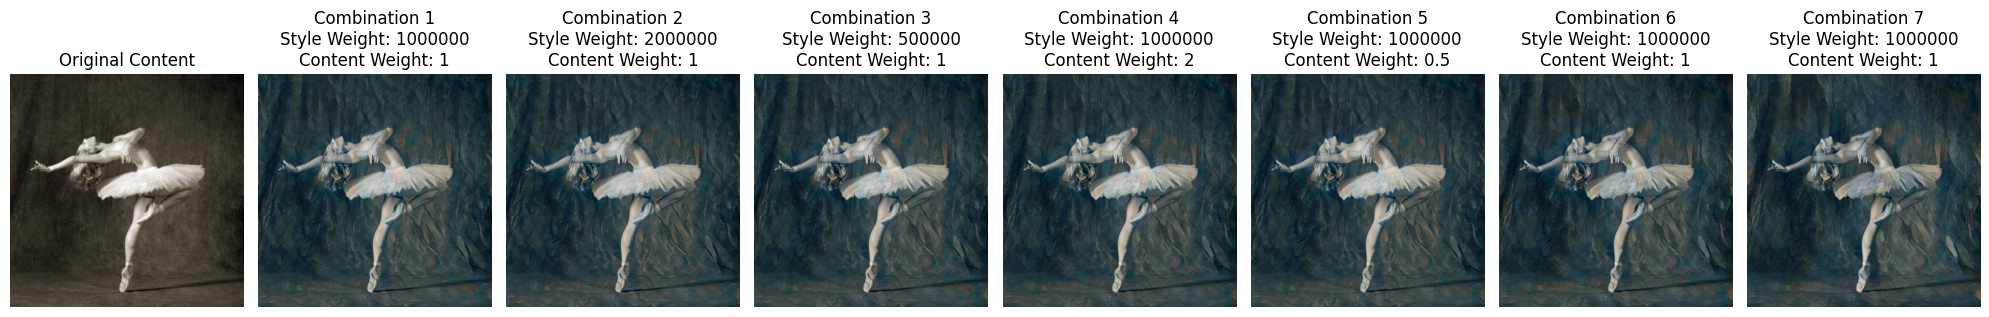

In [17]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1}---------------------')
    output_filename = f"./testing_data/output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test different content layers!

--------------------- Experiment 1 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 4.125848 Content Loss: 2.299819

run [100]:
Style Loss : 1.030570 Content Loss: 1.798174

run [150]:
Style Loss : 0.626760 Content Loss: 1.519714

run [200]:
Style Loss : 0.407799 Content Loss: 1.399336

run [250]:
Style Loss : 0.283395 Content Loss: 1.329576

run [300]:
Style Loss : 0.202414 Content Loss: 1.283120

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..
run

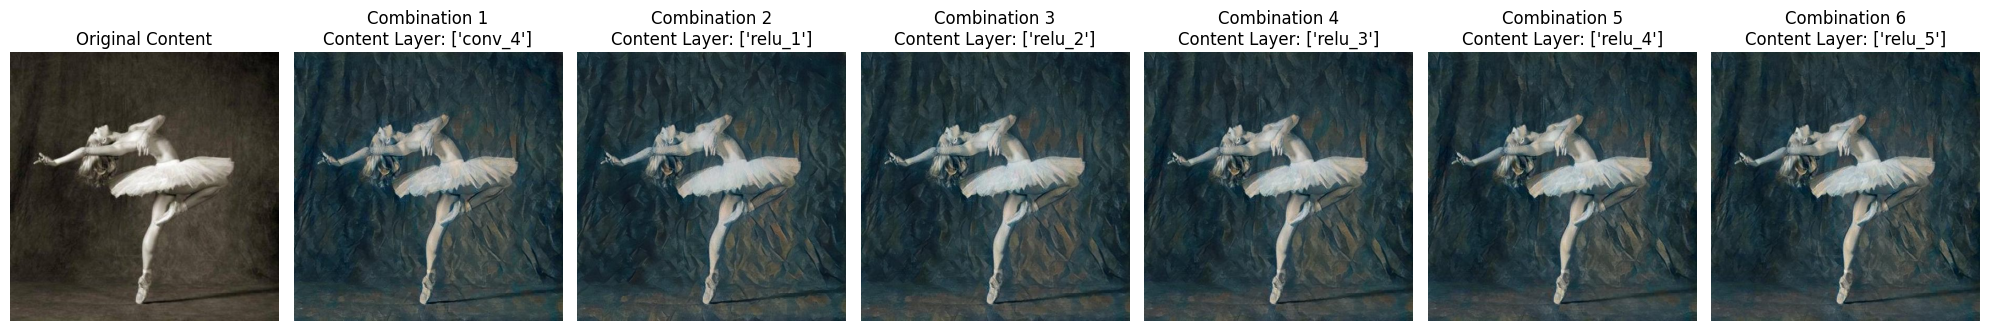

In [18]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_2'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_3'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_4'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_5'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'}
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 6))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/diff_content_layer_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}\nContent Layer: {params['content_layers']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()

# Test different Total Variation Regularization

--------------------- Experiment 1 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.1
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 473.163300 Content Loss: 3.297311

run [100]:
Style Loss : 425.616119 Content Loss: 4.326604

run [150]:
Style Loss : 397.686371 Content Loss: 4.948527

run [200]:
Style Loss : 376.720062 Content Loss: 5.386497

run [250]:
Style Loss : 357.455139 Content Loss: 5.747458

run [300]:
Style Loss : 336.764557 Content Loss: 6.078824

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.1
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizi

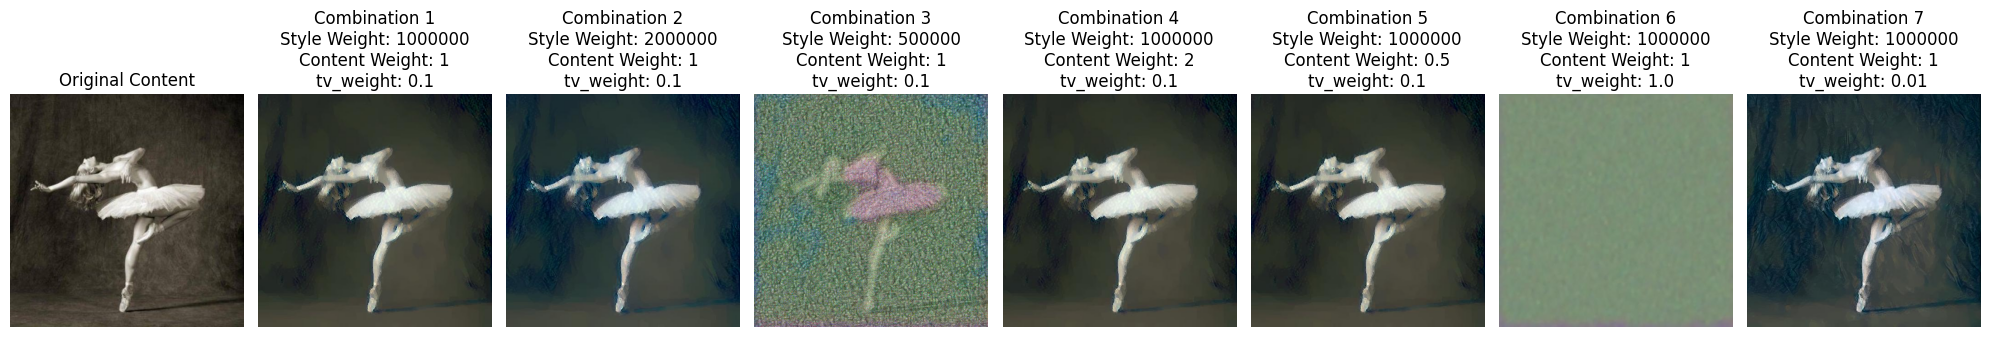

In [19]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 1.0, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.01, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/diff_tv_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}\ntv_weight: {params['tv_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test Adam Optimizer

--------------------- Experiment 1 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..
run [50]:
Style Loss : 29.049753 Content Loss: 5.267965

run [100]:
Style Loss : 2.395927 Content Loss: 4.101945

run [150]:
Style Loss : 1.568233 Content Loss: 3.407393

run [200]:
Style Loss : 1.234985 Content Loss: 3.075124

run [250]:
Style Loss : 1.295682 Content Loss: 2.879909

run [300]:
Style Loss : 0.989013 Content Loss: 2.775680

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..
run [50]

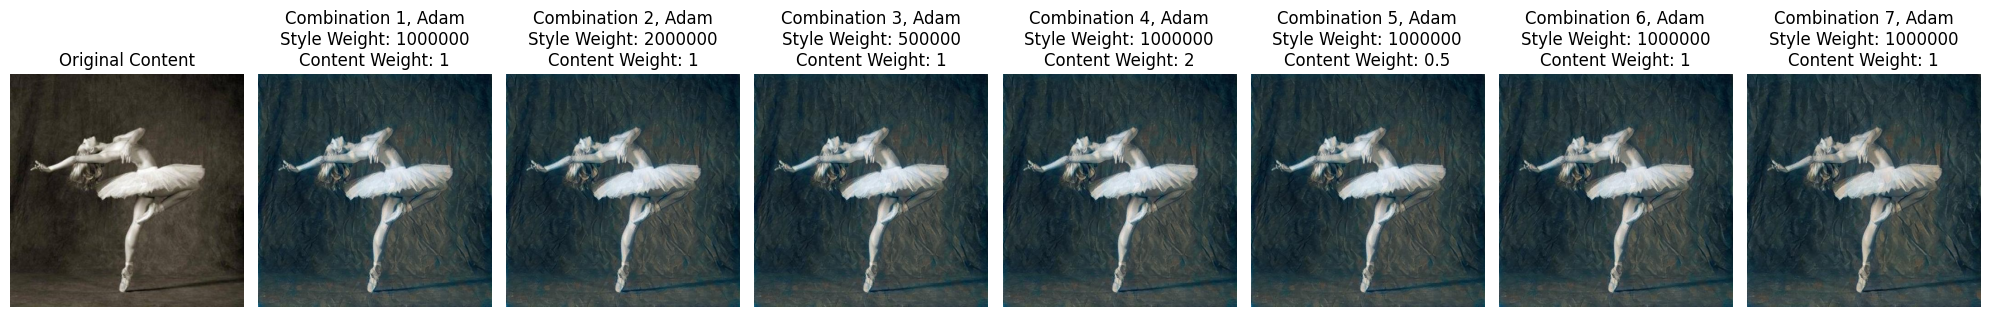

In [20]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam','loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/adam_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, Adam\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test Perceptual Loss

--------------------- Experiment 1 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 434.225922 Content Loss: 11.303898

run [100]:
Style Loss : 289.715515 Content Loss: 11.962065

run [150]:
Style Loss : 183.231888 Content Loss: 12.229404

run [200]:
Style Loss : 112.325668 Content Loss: 12.345630

run [250]:
Style Loss : 74.562187 Content Loss: 12.399475

run [300]:
Style Loss : 52.771858 Content Loss: 12.430790

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfg

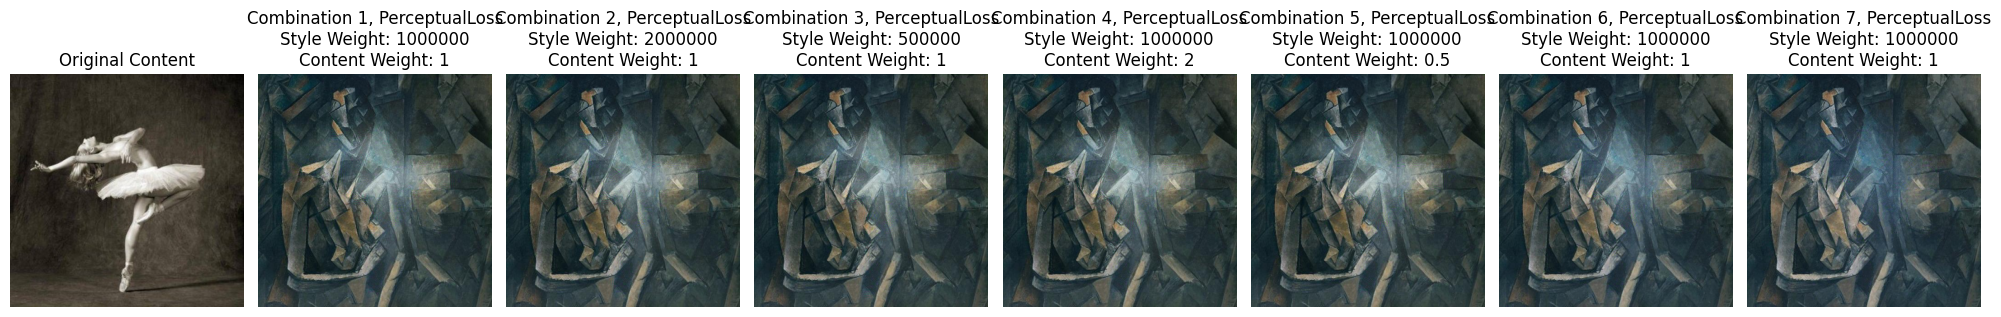

In [21]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs','loss_choice':'perceptual'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/perceptual_loss_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, PerceptualLoss\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Further Test Style Weight

--------------------- Experiment 1 ----------------------
model:  vgg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  10.0
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 0.000277 Content Loss: 0.000000

run [100]:
Style Loss : 0.000277 Content Loss: 0.000000

run [150]:
Style Loss : 0.000277 Content Loss: 0.000000

run [200]:
Style Loss : 0.000277 Content Loss: 0.000000

run [250]:
Style Loss : 0.000277 Content Loss: 0.000000

run [300]:
Style Loss : 0.000277 Content Loss: 0.000000

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  100.0
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 0.002764 Content Loss: 0.000000

run [100]:
Style Loss : 0.002758 Content Loss: 0.000000

run [150]:
Style Loss : 0.002752 Content Loss: 0.000000

run [200]:
Style Loss : 0.002746 Content Loss: 0.000000

run [250]:
Style Loss : 0.002740 Content Loss: 0.000000

run [300]:
Style Loss : 0.002734 Content Loss: 0.

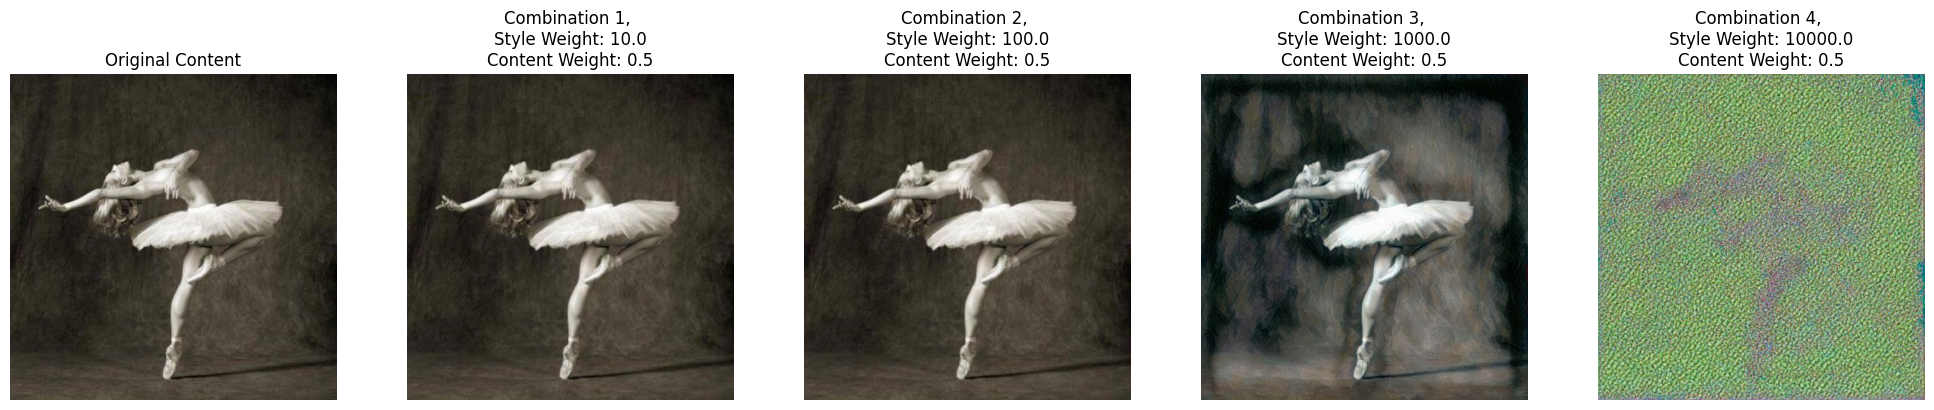

In [22]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1e1, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e2, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e3, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e4, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 4))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/style_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, \nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


--------------------- Experiment 1 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000.0
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 0.093842 Content Loss: 0.026206

run [100]:
Style Loss : 0.024747 Content Loss: 0.027814

run [150]:
Style Loss : 0.012245 Content Loss: 0.028301

run [200]:
Style Loss : 0.007141 Content Loss: 0.028233

run [250]:
Style Loss : 0.004753 Content Loss: 0.027870

run [300]:
Style Loss : 0.003414 Content Loss: 0.027444

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000.0
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..

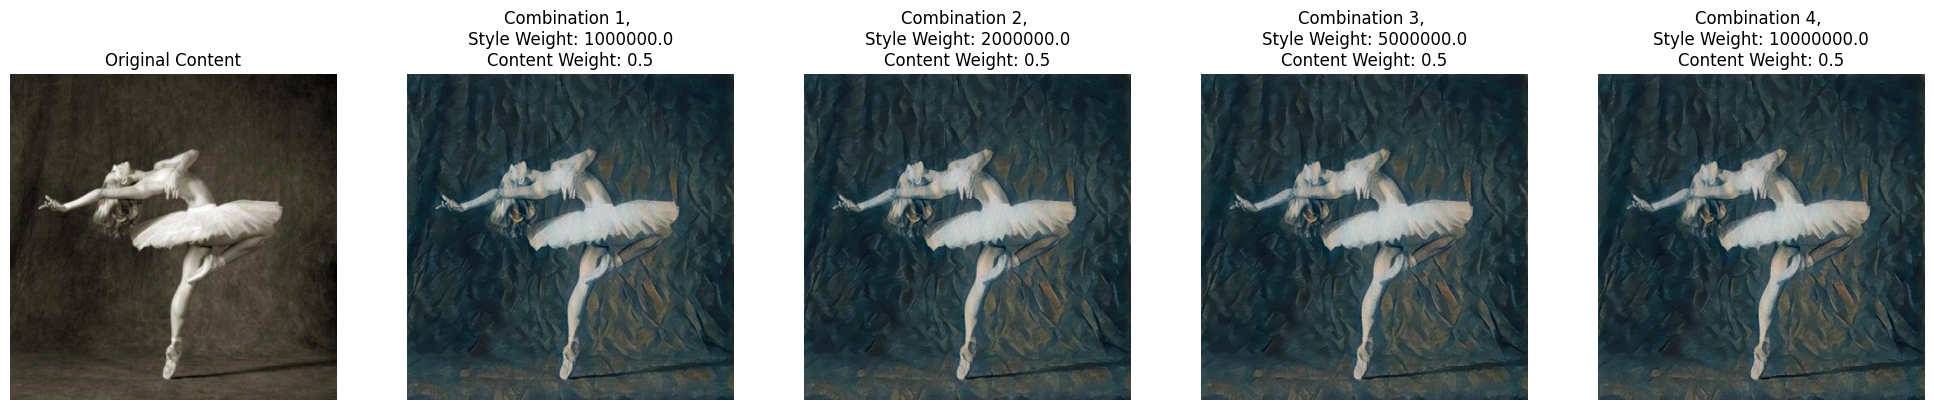

In [23]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1e6, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 2e6, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 5e6, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e7, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 4))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/more_style_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, \nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


--------------------- Experiment 1 ----------------------
model:  vgg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000000.0
content_weight:  100000.0
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 789.455383 Content Loss: 2555.662109

run [100]:
Style Loss : 753.607849 Content Loss: 2502.381104

run [150]:
Style Loss : 757.736084 Content Loss: 2535.252441

run [200]:
Style Loss : 1024393.625000 Content Loss: 17866.441406

run [250]:
Style Loss : 223484576.000000 Content Loss: 363690.031250

run [300]:
Style Loss : 9376.500977 Content Loss: 10537.149414

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000000.0
content_weight:  1000000.0
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 7595.739258 Content Loss: 5319.337402

run [100]:
Style Loss : 9309.674805 Content Loss: 18469.064453

run [150]:
Style Loss : 26487728.000000 Content Loss: 1855844.000000

run [200]:
Style Loss :  nan Content Loss:  nan

run [250]:
Style Loss :  nan C

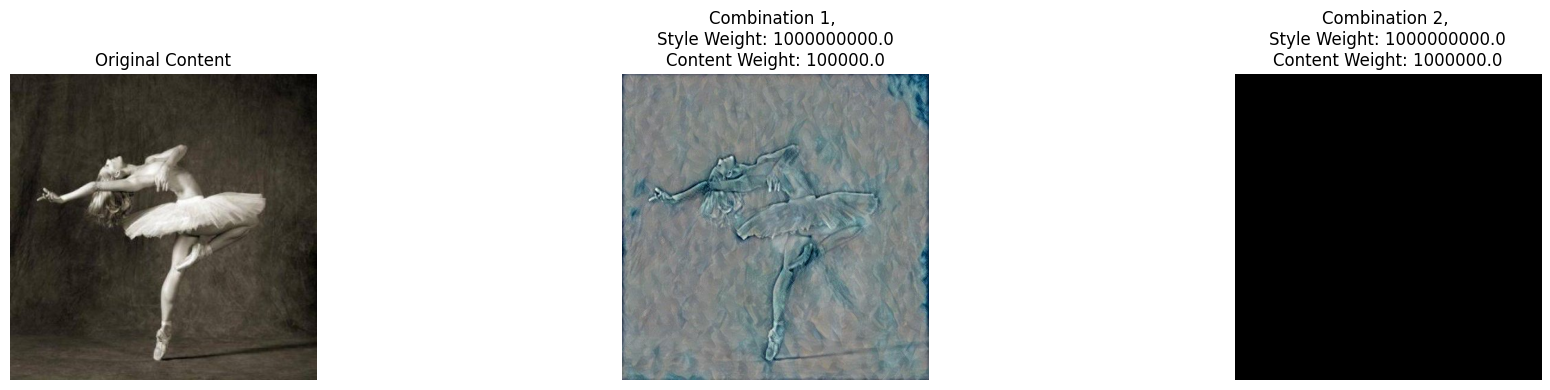

In [29]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1e9, "content_weight": 1e5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e9, "content_weight": 1e6, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 4))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/more_more_style_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, \nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Further Test TV weight

--------------------- Experiment 1 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000000.0
content_weight:  0.01
TV Weight:  10.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..
run [50]:
Style Loss : 187492.875000 Content Loss: 0.001751

run [100]:
Style Loss : 200002.906250 Content Loss: 0.001821

run [150]:
Style Loss : 272649.968750 Content Loss: 0.002906

run [200]:
Style Loss : 697697.625000 Content Loss: 0.004821

run [250]:
Style Loss : 30425.498047 Content Loss: 0.000910

run [300]:
Style Loss : 247406.484375 Content Loss: 0.002176

--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000000.0
content_weight:  0.01
TV Weight:  10000.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4'

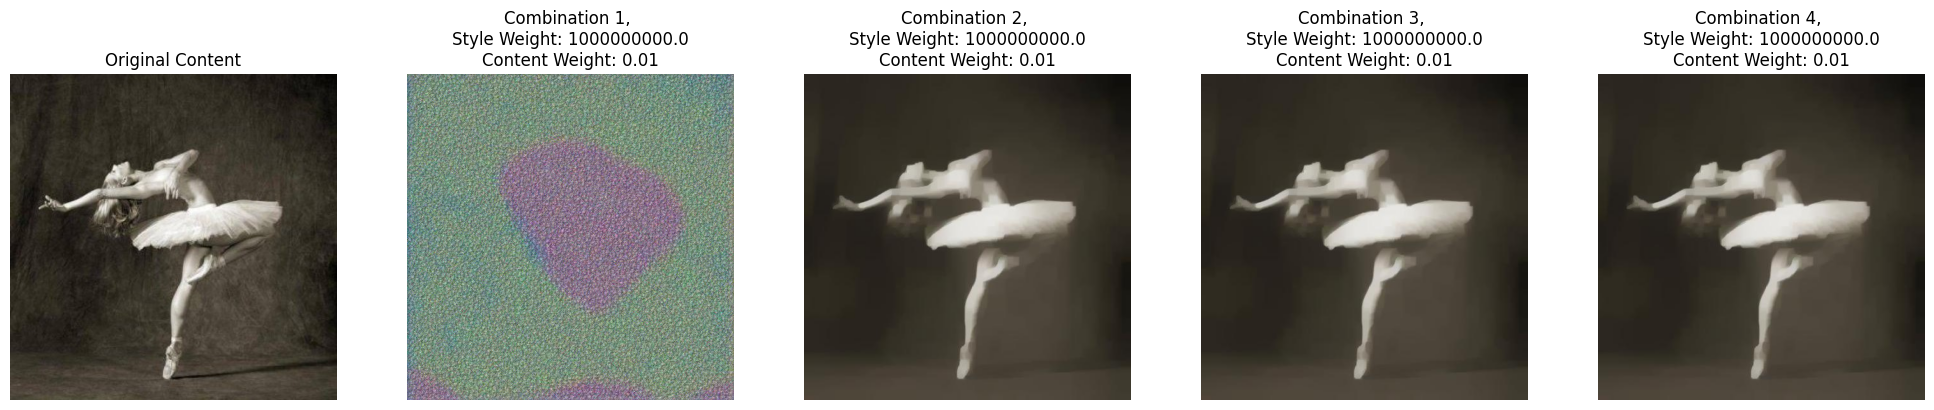

In [27]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1e9, "content_weight": 0.01, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':1e1, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e9, "content_weight": 0.01, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':1e4, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e9, "content_weight": 0.01, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':1e5, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1e9, "content_weight": 0.01, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':1e6, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'}

]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 4))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/more_tv_reg_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, \nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test Resnet

In [15]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def imshow(tensor, title=None):
    unloader = transforms.ToPILImage()  # convert image back to PIL format
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

style_transfer = ResNetStyleTransfer(content_img_path, style_img_path)
output = style_transfer.run_style_transfer()

# Plot the content, style, and output images
plt.figure()
imshow(style_transfer.content_img, title='Content Image')

plt.figure()
imshow(style_transfer.style_img, title='Style Image')

plt.figure()
imshow(output, title='Output Image')



AttributeError: ignored

In [ ]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs','loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/dancing.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/resnet_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, RESNET\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


## Testing Evaluation Metrics

Here we will make sure that the implementation of all evaluation metrics is working

In [ ]:
# Dependencies
!pip install pytorch-fid
!pip install lpips

In [ ]:
# Import libraries and modules
from eval_metrics import EvaluationMetrics

In [ ]:
eval_metrics = EvaluationMetrics(device='cuda')

# Input the correct file paths
generated_image_path = './testing_data/images/output_monet.jpg'   # This is the output of the model. AKA the generated image.

# Compute SSIM
ssim_score = eval_metrics.compute_ssim(content_image_path, generated_image_path)
print(f'SSIM: {ssim_score}')

# Compute PSNR
psnr_score = eval_metrics.compute_psnr(content_image_path, generated_image_path)
print(f'PSNR: {psnr_score}')

# Preprocess the images for feature-based similarity and LPIPS
content_tensor = eval_metrics.preprocess_image(content_image_path)
generated_tensor = eval_metrics.preprocess_image(generated_image_path)

# Compute feature-based similarity
feature_similarity = eval_metrics.compute_feature_similarity(content_tensor, generated_tensor)
print(f'Feature-based similarity (cosine): {feature_similarity}')

# Compute LPIPS and ArtFID
lpips_score, art_fid_score = eval_metrics.compute_lpips_and_artFID(content_tensor, generated_tensor)
print(f'LPIPS: {lpips_score}')
print(f'ArtFID:{art_fid_score}')

In [ ]:
# Note: this is compute over all the style collection and output collection
# Compute FID
#!python -m pytorch_fid "./testing_data/images/picasso.jpg" './testing_data/images/output.jpg' --dims 192